# General temporal aggregation methods

In [1]:
# If first time running, uncomment the line below to install any additional dependancies
# !bash requirements-for-notebooks.sh

In [5]:
from earthkit import aggregate as ek_aggregate
from earthkit import data as ek_data

from earthkit.data.testing import earthkit_remote_test_data_file
ek_data.settings.set("cache-policy", "user")

## Load some test data

All `earthkit-climate` methods can be called with `earthkit-data` objects (Readers and Wrappers) or with the 
pre-loaded `xarray`.

In this example we will use hourly ERA5 2m temperature data on a 0.5x0.5 spatial grid for the year 2015 as
our physical data.

First we download (if not already cached) lazily load the ERA5 data (please see tutorials in `earthkit-data` for more details in cache management).

We inspect the data using the describe method and see we have some 2m air temperature data. For a more detailed representation of the data you can use the to_xarray method.

In [9]:
# Get some demonstration ERA5 data, this could be any url or path to an ERA5 grib or netCDF file.
remote_era5_file = earthkit_remote_test_data_file("test-data", "era5_temperature_europe_2015.grib")
era5_data = ek_data.from_source("url", remote_era5_file)
era5_data.describe()
# era5_data.to_xarray()

,,level,date,time,step,paramId,class,stream,type,experimentVersionNumber
shortName,typeOfLevel,,,,,,,,,
2t,surface,0,"20150301,20150302,...","0,1800,...",0,167,ea,oper,an,0001


## Reduce the ERA5 data over the time dimension

The default reduction method is `mean`, other methods can be applied using the `how` kwarg.

Note that we do not need to worry about the data format of the input array, earthkit will convert it to the required xarray format internally.

The returned object is an xarray dataset, however this may change in future version of the package.

### The mean over the time dimension

In [10]:
era5_t_mean = ek_aggregate.temporal.reduce(era5_data)  # how="mean"
era5_t_mean

<xarray.Dataset> Size: 230kB
Dimensions:    (number: 1, step: 1, surface: 1, latitude: 201, longitude: 281)
Coordinates:
  * number     (number) int64 8B 0
  * step       (step) timedelta64[ns] 8B 00:00:00
  * surface    (surface) float64 8B 0.0
  * latitude   (latitude) float64 2kB 80.0 79.75 79.5 79.25 ... 30.5 30.25 30.0
  * longitude  (longitude) float64 2kB -10.0 -9.75 -9.5 ... 59.5 59.75 60.0
Data variables:
    t2m_mean   (number, step, surface, latitude, longitude) float32 226kB 262...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-03-25T12:36 GRIB to CDM+CF via cfgrib-0.9.1...

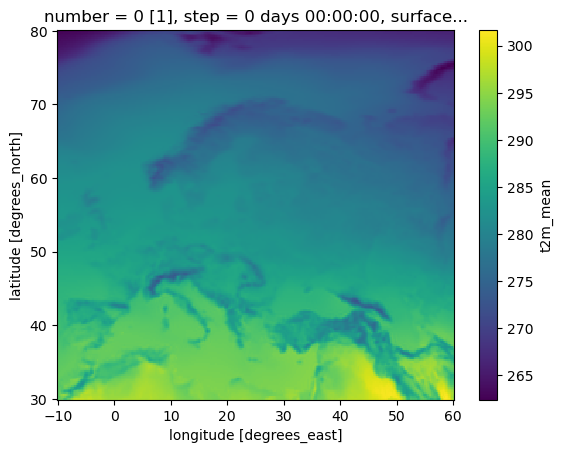

In [16]:
# A simple matplotlib plot to view the data:
era5_t_mean.t2m_mean.plot()

### The median over the time dimension

In [23]:
era5_t_median = ek_aggregate.temporal.reduce(era5_data, how="median")
era5_t_median

<xarray.Dataset> Size: 230kB
Dimensions:     (number: 1, step: 1, surface: 1, latitude: 201, longitude: 281)
Coordinates:
  * number      (number) int64 8B 0
  * step        (step) timedelta64[ns] 8B 00:00:00
  * surface     (surface) float64 8B 0.0
  * latitude    (latitude) float64 2kB 80.0 79.75 79.5 79.25 ... 30.5 30.25 30.0
  * longitude   (longitude) float64 2kB -10.0 -9.75 -9.5 ... 59.5 59.75 60.0
Data variables:
    t2m_median  (number, step, surface, latitude, longitude) float32 226kB 26...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-03-25T12:48 GRIB to CDM+CF via cfgrib-0.9.1...

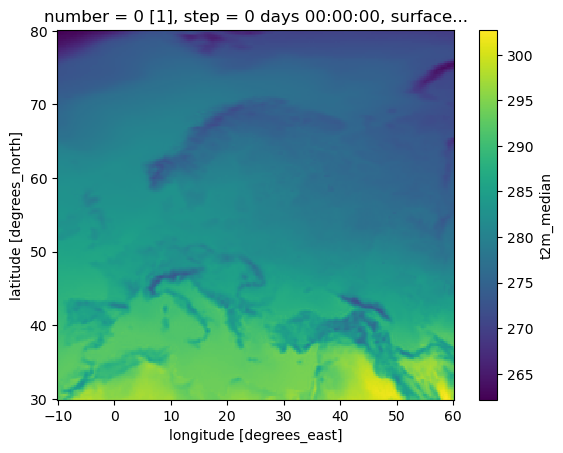

In [24]:
# A simple matplotlib plot to view the data:
era5_t_median.t2m_median.plot()

## Calculate a rolling mean with a 50 timestep window

There is no temporal specific method for a rolling reduction. The general rolling_reduce method can do this calculation by specifying the dimension over which you would like to reduce.

In [25]:
era5_rolling = ek_aggregate.rolling_reduce(
    era5_data, time=50, center=True,
)
era5_rolling

<xarray.Dataset> Size: 330MB
Dimensions:     (number: 1, time: 1460, step: 1, surface: 1, latitude: 201,
                 longitude: 281)
Coordinates:
  * number      (number) int64 8B 0
  * time        (time) datetime64[ns] 12kB 2015-01-01 ... 2015-12-31T18:00:00
  * step        (step) timedelta64[ns] 8B 00:00:00
  * surface     (surface) float64 8B 0.0
  * latitude    (latitude) float64 2kB 80.0 79.75 79.5 79.25 ... 30.5 30.25 30.0
  * longitude   (longitude) float64 2kB -10.0 -9.75 -9.5 ... 59.5 59.75 60.0
    valid_time  (time, step) datetime64[ns] 12kB dask.array<chunksize=(1460, 1), meta=np.ndarray>
Data variables:
    t2m_mean    (number, time, step, surface, latitude, longitude) float32 330MB dask.array<chunksize=(1, 1459, 1, 1, 201, 281), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-03-25T12:49 GRIB to CDM+CF via cfgrib-0.9.1...